In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glhmm.glhmm as glhmm
import seaborn as sns
import network_tools as nt
import importlib
import networkx as nx
import dynamics as dyn
from scipy.linalg import eig
import csv
from sklearn.cluster import KMeans,MiniBatchKMeans
import statespacesplitting as sss
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib
import hmm_helper as hmmh
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [38]:
importlib.reload(nt)
importlib.reload(dyn)
importlib.reload(sss)
importlib.reload(hmmh)

<module 'hmm_helper' from '/home/nartallokalu/Desktop/hmm/hmm_helper.py'>

In [12]:
N = 10
W = nt.generate_hierarchical_network(N,mu = 0.2,p0 = 1,recip = 10)
L = nt.Laplacian(W)

In [13]:
Theta = 2
gamma = 0.2
sigma = 0.05
dt = 0.05
steps = 1000
print(np.real(np.linalg.eig(Theta*(np.diag(np.ones(N))-gamma*W)).eigenvalues)>0)
Phi = dyn.EPR_network_ornstein_uhlenbeck(W,sigma,Theta,gamma)

[ True  True  True  True  True  True  True  True  True  True]


In [39]:
[X,t] = dyn.network_ornstein_uhlenbeck(nt.parameterise_network(W,1),sigma,Theta,gamma,dt,steps)
Z= X
tau = 20
X_sampled = X[:,0::tau]
t_sampled= t[0::tau]

In [40]:
Y = nt.LaplaceEigenmodeProjection(W,X)
Y = Y[1:4,:]
X = Y

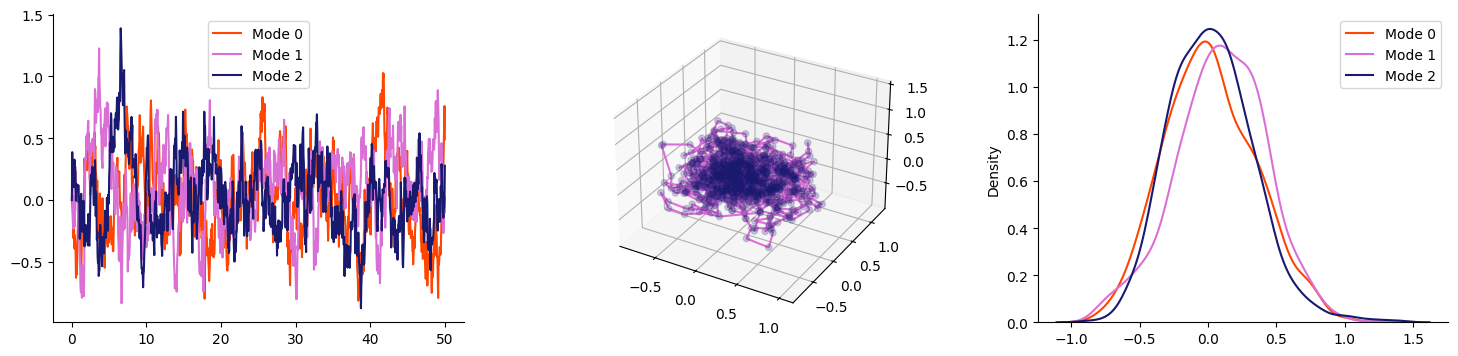

<Figure size 640x480 with 0 Axes>

In [41]:
fig = plt.figure()
axs=[0,0,0]
axs[0] = fig.add_subplot(1,3,1)
axs[1] = fig.add_subplot(1,3,2,projection='3d')
axs[2] = fig.add_subplot(1,3,3)
fig.set_size_inches(18,4)
cols = ['orangered','orchid','midnightblue']
for i in range(0,3):
    sns.lineplot(x=t,y=Y[i,:],label = 'Mode '+str(i),ax=axs[0],color=cols[i])
    sns.despine()
    sns.kdeplot(Y[i,:],label='Mode '+str(i),color=cols[i],ax=axs[2])
axs[1].plot(Y[0,:], Y[1,:], Y[2,:], color = 'orchid')
axs[1].scatter(Y[0,:], Y[1,:], Y[2,:], color = 'midnightblue',alpha=0.2)
axs[2].legend()
plt.show()
sns.despine()
plt.tight_layout()
plt.show()

/var/folders/j3/3jf2wkbj5756yfdv4zjq5j300000gn/T/ipykernel_54494/528250396.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('magma_r')


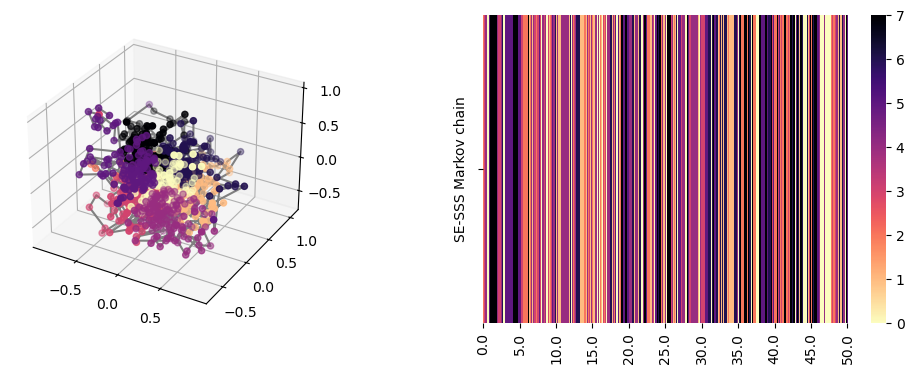

In [77]:
box_tc, box_idx_tc = sss.state_space_split(X,3,sss.boundary_list_stat_even(X,[2,2,2]))
colours =['orangered','orchid','midnightblue','forestgreen','violet','gold','lightblue','black']
fig = plt.figure()
fig.set_size_inches(20,4)
axs=[0,0]
axs[1] = fig.add_subplot(1,3,2)
axs[0] = fig.add_subplot(1,3,1,projection='3d')
bidx = np.array(box_idx_tc)
for i in range(0,8):
    cmap = matplotlib.cm.get_cmap('magma_r')
    rgba = cmap(i/7)
    axs[0].scatter(X[0,np.where(bidx==i)[0]], X[1,np.where(bidx==i)[0]], X[2,np.where(bidx==i)[0]], color = rgba)
axs[0].plot(X[0,], X[1,], X[2,], color = 'grey')
df = pd.DataFrame({"SSS":box_idx_tc},index =t)
sns.heatmap(np.transpose(df),cmap='magma_r',ax=axs[1])
axs[1].set_xticks(np.linspace(0,1000,11))
axs[1].set_xticklabels(np.linspace(0,50,11))
axs[1].set_yticklabels('')
axs[1].set_ylabel('SE-SSS Markov chain')
plt.show()
SE_SSS_TP = dyn.markov_chain_to_TP(box_idx_tc,8)

/var/folders/j3/3jf2wkbj5756yfdv4zjq5j300000gn/T/ipykernel_54494/2142964681.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('magma_r')


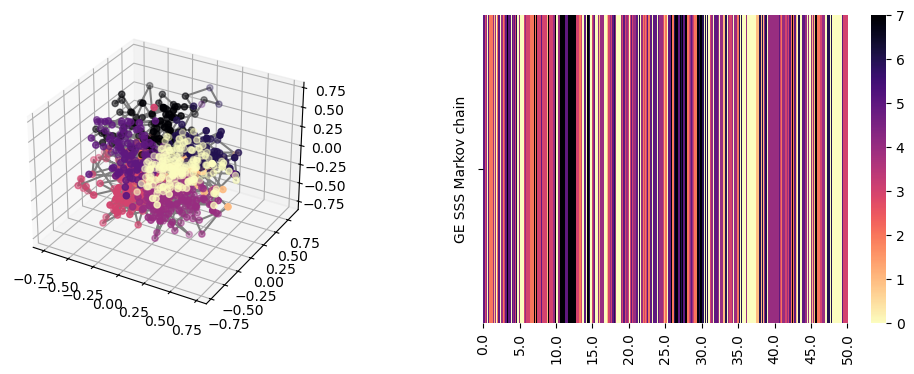

In [81]:
box_tc, box_idx_tc = sss.state_space_split(X,3,sss.boundary_list_geom_even(X,[2,2,2]))
fig = plt.figure()
fig.set_size_inches(20,4)
axs=[0,0]
axs[1] = fig.add_subplot(1,3,2)
axs[0] = fig.add_subplot(1,3,1,projection='3d')
bidx = np.array(box_idx_tc)
for i in range(0,8):
    cmap = matplotlib.cm.get_cmap('magma_r')
    rgba = cmap(i/7)
    axs[0].scatter(X[0,np.where(bidx==i)[0]], X[1,np.where(bidx==i)[0]], X[2,np.where(bidx==i)[0]], color = rgba)
axs[0].plot(X[0,], X[1,], X[2,], color = 'grey')
df = pd.DataFrame({"SSS":box_idx_tc},index =t)
sns.heatmap(np.transpose(df),cmap='magma_r',ax=axs[1])
axs[1].set_xticks(np.linspace(0,1000,11))
axs[1].set_xticklabels(np.linspace(0,50,11))
axs[1].set_yticklabels('')
axs[1].set_ylabel('GE SSS Markov chain')
plt.show()
GE_SSS_TP = dyn.markov_chain_to_TP(box_idx_tc,8)

Init repetition 1 free energy = 716.794270363085
Init repetition 2 free energy = 718.7281811539481
Init repetition 3 free energy = 732.3641057323644
Init repetition 4 free energy = 686.2557585800232
Init repetition 5 free energy = 678.4603528796181
Best repetition: 5
State 5 is deactivated
State 6 is deactivated
Cycle 1 free energy = 821.5597617137009
Cycle 2 free energy = 672.9325848565979
Cycle 3, free energy = 670.2042738640328, relative change = 0.01802584783232335
Cycle 4, free energy = 669.3097160513569, relative change = 0.005875583214338143
Cycle 5, free energy = 668.8204406587952, relative change = 0.003203336175534084
Cycle 6, free energy = 668.5601871606286, relative change = 0.0017010079859815042
Cycle 7, free energy = 668.4210203938617, relative change = 0.0009087626394701135
Cycle 8, free energy = 668.0907054196261, relative change = 0.0021523229647192887
Cycle 9, free energy = 663.8618297186459, relative change = 0.026816304104183293
Cycle 10, free energy = 673.533322980

/var/folders/j3/3jf2wkbj5756yfdv4zjq5j300000gn/T/ipykernel_54494/2662060155.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('magma_r')


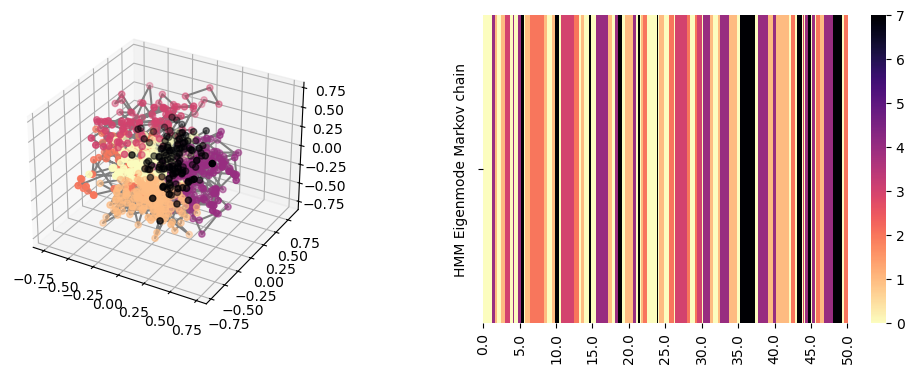

In [83]:
hmm = glhmm.glhmm(model_beta='no', K=8, covtype='full')
hmm.train(X=None, Y=np.transpose(X))
hmm_tc = hmmh.vector_time_course_to_tc(hmm.decode(X=None, Y=np.transpose(X),viterbi=True))
fig = plt.figure()
fig.set_size_inches(20,4)
axs=[0,0]
axs[1] = fig.add_subplot(1,3,2)
axs[0] = fig.add_subplot(1,3,1,projection='3d')
bidx = np.array(hmm_tc)
for i in range(0,8):
    cmap = matplotlib.cm.get_cmap('magma_r')
    rgba = cmap(i/7)
    axs[0].scatter(X[0,np.where(bidx==i)[0]], X[1,np.where(bidx==i)[0]], X[2,np.where(bidx==i)[0]], color = rgba)
axs[0].plot(X[0,], X[1,], X[2,], color = 'grey')
df = pd.DataFrame({"SSS":hmm_tc},index =t)
sns.heatmap(np.transpose(df),cmap='magma_r',ax=axs[1])
axs[1].set_xticks(np.linspace(0,1000,11))
axs[1].set_xticklabels(np.linspace(0,50,11))
axs[1].set_yticklabels('')
axs[1].set_ylabel('HMM Eigenmode Markov chain')
plt.show()

Init repetition 1 free energy = 3775.6320483090494
Init repetition 2 free energy = 3830.0007785781063
Init repetition 3 free energy = 3760.5385162901266
Init repetition 4 free energy = 3857.928437695865
Init repetition 5 free energy = 3736.230510749448
Best repetition: 5
Cycle 1 free energy = 3801.0753441478846
Cycle 2 free energy = 3724.2200336883934
Cycle 3, free energy = 3709.6018495992575, relative change = 0.15980786741852177
Cycle 4, free energy = 3700.6901967757085, relative change = 0.08877461513812653
Cycle 5, free energy = 3699.614509918979, relative change = 0.01060199105304746
Cycle 6, free energy = 3699.435091133282, relative change = 0.0017652335602799892
Cycle 7, free energy = 3699.343750160837, relative change = 0.0008978623932399258
Cycle 8, free energy = 3699.269637489233, relative change = 0.000727981505519784
Cycle 9, free energy = 3699.192377821889, relative change = 0.0007583178045380309
Cycle 10, free energy = 3699.0997815222186, relative change = 0.0009080244059

/var/folders/j3/3jf2wkbj5756yfdv4zjq5j300000gn/T/ipykernel_54494/3691606192.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('magma_r')


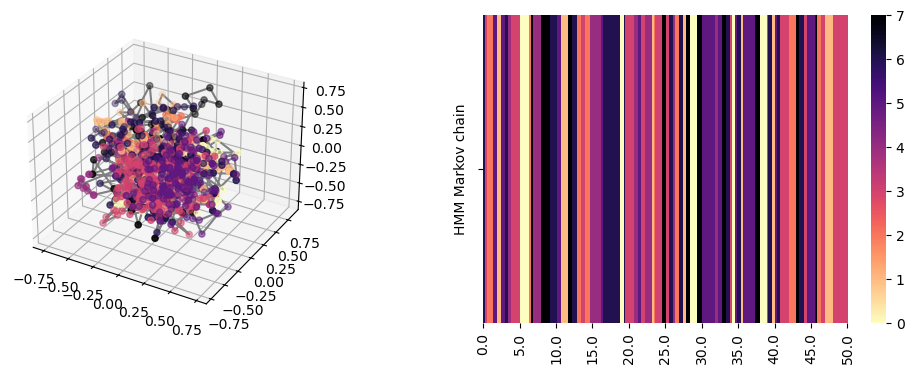

In [85]:
hmm = glhmm.glhmm(model_beta='no', K=8, covtype='full')
hmm.train(X=None, Y=np.transpose(Z))
hmm_tc = hmmh.vector_time_course_to_tc(hmm.decode(X=None, Y=np.transpose(Z),viterbi=True))
fig = plt.figure()
fig.set_size_inches(20,4)
axs=[0,0]
axs[1] = fig.add_subplot(1,3,2)
axs[0] = fig.add_subplot(1,3,1,projection='3d')
bidx = np.array(hmm_tc)
for i in range(0,8):
    cmap = matplotlib.cm.get_cmap('magma_r')
    rgba = cmap(i/7)
    axs[0].scatter(X[0,np.where(bidx==i)[0]], X[1,np.where(bidx==i)[0]], X[2,np.where(bidx==i)[0]], color = rgba)
axs[0].plot(X[0,], X[1,], X[2,], color = 'grey')
df = pd.DataFrame({"SSS":hmm_tc},index =t)
sns.heatmap(np.transpose(df),cmap='magma_r',ax=axs[1])
axs[1].set_xticks(np.linspace(0,1000,11))
axs[1].set_xticklabels(np.linspace(0,50,11))
axs[1].set_yticklabels('')
axs[1].set_ylabel('HMM Markov chain')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 8).fit(np.transpose(X))
fig = plt.figure()
fig.set_size_inches(20,4)
axs=[0,0]
axs[1] = fig.add_subplot(1,3,2)
axs[0] = fig.add_subplot(1,3,1,projection='3d')
bidx = np.array(kmeans.labels_)
for i in range(0,8):
    cmap = matplotlib.cm.get_cmap('magma_r')
    rgba = cmap(i/7)
    axs[0].scatter(X[0,np.where(bidx==i)[0]], X[1,np.where(bidx==i)[0]], X[2,np.where(bidx==i)[0]], color = rgba)
axs[0].plot(X[0,], X[1,], X[2,], color = 'grey')
df = pd.DataFrame({"SSS":kmeans.labels_},index =t)
sns.heatmap(np.transpose(df),cmap='magma_r',ax=axs[1])
axs[1].set_xticks(np.linspace(0,1000,11))
axs[1].set_xticklabels(np.linspace(0,50,11))
axs[1].set_yticklabels('')
axs[1].set_ylabel('k-means Eigenmode Markov chain')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 8).fit(np.transpose(Z))
fig = plt.figure()
fig.set_size_inches(20,4)
axs=[0,0]
axs[1] = fig.add_subplot(1,3,2)
axs[0] = fig.add_subplot(1,3,1,projection='3d')
bidx = np.array(kmeans.labels_)
for i in range(0,8):
    cmap = matplotlib.cm.get_cmap('magma_r')
    rgba = cmap(i/7)
    axs[0].scatter(X[0,np.where(bidx==i)[0]], X[1,np.where(bidx==i)[0]], X[2,np.where(bidx==i)[0]], color = rgba)
axs[0].plot(X[0,], X[1,], X[2,], color = 'grey')
df = pd.DataFrame({"SSS":kmeans.labels_},index =t)
sns.heatmap(np.transpose(df),cmap='magma_r',ax=axs[1])
axs[1].set_xticks(np.linspace(0,1000,11))
axs[1].set_xticklabels(np.linspace(0,50,11))
axs[1].set_yticklabels('')
axs[1].set_ylabel('k-means Markov chain')
plt.show()

In [9]:
sc = StandardScaler()


EPR_true = []
trials = 50
eps_N = 100
EPR_kmeans_JSD =np.zeros((trials,eps_N))
EPR_HMM_JSD =np.zeros((trials,eps_N))
EPR_HMM_PCA_JSD =np.zeros((trials,eps_N))
EPR_kmeans_PCA_JSD =np.zeros((trials,eps_N))
EPR_HMM__PCA_JSD =np.zeros((trials,eps_N))
EPR_SESSS_JSD =np.zeros((trials,eps_N))
EPR_GESSS_JSD =np.zeros((trials,eps_N))

EPR_SESSS_LP_JSD =np.zeros((trials,eps_N))
EPR_GESSS_LP_JSD =np.zeros((trials,eps_N))
EPR_HMM_LP_JSD =np.zeros((trials,eps_N))
EPR_kmeans_LP_JSD =np.zeros((trials,eps_N))

K=8
eps_range = np.linspace(0,1,eps_N)

for eps_i in range(0,eps_N):
    eps = eps_range[eps_i]
    W_hat = nt.parameterise_network(W,eps)
    Phi = dyn.EPR_network_ornstein_uhlenbeck(W_hat,sigma,Theta,gamma)
    EPR_true.append(Phi)
    for trial in range(0,trials):
        [X,t] = dyn.network_ornstein_uhlenbeck(nt.parameterise_network(W,eps),sigma,Theta,gamma,dt,steps=5000)

        kmeans = KMeans(n_clusters = K).fit(np.transpose(X))
        km_JTP = dyn.markov_chain_to_JTP(kmeans.labels_,N=K)
        EPR_kmeans_JSD[trial,eps_i]= dyn.EPR_markov_chain_joint_JSD(km_JTP)

        hmm = glhmm.glhmm(model_beta='no', K=8, covtype='full')
        hmm.train(X=None, Y=np.transpose(X))
        hmm_tc = hmmh.vector_time_course_to_tc(hmm.decode(X=None, Y=np.transpose(X),viterbi=True))
        hmm_JTP = dyn.markov_chain_to_JTP(hmm_tc,N=K)
        EPR_HMM_JSD[trial,eps_i]= dyn.EPR_markov_chain_joint_JSD(hmm_JTP)


        X_std = sc.fit_transform(np.transpose(X))
        pca = PCA(n_components=3)
        X_pca = pca.fit(X_std)
        X_pca = np.transpose(pca.transform(X_std))

        kmeans = KMeans(n_clusters = K).fit(np.transpose(X_pca))
        km_JTP = dyn.markov_chain_to_JTP(kmeans.labels_,N=K)
        EPR_kmeans_PCA_JSD[trial,eps_i]= dyn.EPR_markov_chain_joint_JSD(km_JTP)

        hmm = glhmm.glhmm(model_beta='no', K=8, covtype='full')
        hmm.train(X=None, Y=np.transpose(X_pca))
        hmm_tc = hmmh.vector_time_course_to_tc(hmm.decode(X=None, Y=np.transpose(X_pca),viterbi=True))
        hmm_JTP = dyn.markov_chain_to_JTP(hmm_tc,N=K)
        EPR_HMM_PCA_JSD[trial,eps_i]= dyn.EPR_markov_chain_joint_JSD(hmm_JTP)

        box_tc, box_idx_tc = sss.state_space_split(X_pca,3,sss.boundary_list_geom_even(X_pca,[2,2,2]))
        gesss_JTP = dyn.markov_chain_to_JTP(box_idx_tc,N=K)
        EPR_GESSS_JSD[trial,eps_i]= dyn.EPR_markov_chain_joint_JSD(gesss_JTP)

        box_tc, box_idx_tc = sss.state_space_split(X_pca,3,sss.boundary_list_stat_even(X_pca,[2,2,2]))
        sesss_JTP = dyn.markov_chain_to_JTP(box_idx_tc,N=K)
        EPR_SESSS_JSD[trial,eps_i]= dyn.EPR_markov_chain_joint_JSD(sesss_JTP)

        Y = nt.LaplaceEigenmodeProjection(W_hat,X)
        Y = Y[0:3,:]

        kmeans = KMeans(n_clusters = K).fit(np.transpose(Y))
        km_JTP = dyn.markov_chain_to_JTP(kmeans.labels_,N=K)
        EPR_kmeans_LP_JSD[trial,eps_i]= dyn.EPR_markov_chain_joint_JSD(km_JTP)

        hmm = glhmm.glhmm(model_beta='no', K=8, covtype='full')
        hmm.train(X=None, Y=np.transpose(Y))
        hmm_tc = hmmh.vector_time_course_to_tc(hmm.decode(X=None, Y=np.transpose(Y),viterbi=True))
        hmm_JTP = dyn.markov_chain_to_JTP(hmm_tc,N=K)
        EPR_HMM_LP_JSD[trial,eps_i]= dyn.EPR_markov_chain_joint_JSD(hmm_JTP)

        box_tc, box_idx_tc = sss.state_space_split(Y,3,sss.boundary_list_geom_even(Y,[2,2,2]))
        gesss_JTP = dyn.markov_chain_to_JTP(box_idx_tc,N=K)
        EPR_GESSS_LP_JSD[trial,eps_i]= dyn.EPR_markov_chain_joint_JSD(gesss_JTP)

        box_tc, box_idx_tc = sss.state_space_split(Y,3,sss.boundary_list_stat_even(Y,[2,2,2]))
        sesss_JTP = dyn.markov_chain_to_JTP(box_idx_tc,N=K)
        EPR_SESSS_LP_JSD[trial,eps_i]= dyn.EPR_markov_chain_joint_JSD(sesss_JTP)




EPR_kmeans_JSD = pd.DataFrame(EPR_kmeans_JSD)
EPR_kmeans_JSD.to_csv('EPRkmeansJSD.csv',index=False)
EPR_HMM_JSD = pd.DataFrame(EPR_HMM_JSD)
EPR_HMM_JSD.to_csv('EPR_HMM_JSD.csv',index=False)

EPR_kmeans_PCA_JSD = pd.DataFrame(EPR_kmeans_PCA_JSD)
EPR_kmeans_PCA_JSD.to_csv('EPRkmeansPCAJSD.csv',index=False)
EPR_HMM_PCA_JSD = pd.DataFrame(EPR_HMM_PCA_JSD)
EPR_HMM_PCA_JSD.to_csv('EPR_HMM_PCA_JSD.csv',index=False)

EPR_GESSS_JSD = pd.DataFrame(EPR_GESSS_JSD)
EPR_GESSS_JSD.to_csv('EPR_GESSS_JSD.csv',index=False)
EPR_SESSS_JSD = pd.DataFrame(EPR_SESSS_JSD)
EPR_SESSS_JSD.to_csv('EPR_SESSS_JSD.csv',index=False)

EPR_kmeans_LP_JSD = pd.DataFrame(EPR_kmeans_LP_JSD)
EPR_kmeans_LP_JSD.to_csv('EPR_kmeans_LP_JSD.csv',index=False)
EPR_HMM_LP_JSD = pd.DataFrame(EPR_HMM_LP_JSD)
EPR_HMM_LP_JSD.to_csv('EPR_HMM_LP_JSD.csv',index=False)

EPR_GESSS_LP_JSD = pd.DataFrame(EPR_GESSS_LP_JSD)
EPR_GESSS_LP_JSD.to_csv('EPR_GESSS_LP_JSD.csv',index=False)
EPR_SESSS_LP_JSD = pd.DataFrame(EPR_SESSS_LP_JSD)
EPR_SESSS_LP_JSD.to_csv('EPR_SESSS_LP_JSD.csv',index=False)

EPR_true = pd.DataFrame(EPR_true)
EPR_true.to_csv('EPR_true.csv',index=False)

Init repetition 1 free energy = 21277.492779586064
Init repetition 2 free energy = 21245.42158694551
Init repetition 3 free energy = 21344.90235526187
Init repetition 4 free energy = 21243.083310183152
Init repetition 5 free energy = 21408.995528566687
Best repetition: 4
Cycle 1 free energy = 21316.530358615695
Cycle 2 free energy = 21146.406888427264
Cycle 3, free energy = 21097.694565242946, relative change = 0.2225976035892119
Cycle 4, free energy = 21064.05647728795, relative change = 0.13323393207286932
Cycle 5, free energy = 21040.082639124143, relative change = 0.08672105600256742
Cycle 6, free energy = 21008.45287485455, relative change = 0.10266821152731914
Cycle 7, free energy = 20998.872834446633, relative change = 0.030158392857137964
Cycle 8, free energy = 20989.998486005385, relative change = 0.02717758719939362
Cycle 9, free energy = 20981.859256036947, relative change = 0.02432008591635848
Cycle 10, free energy = 20959.353141405696, relative change = 0.06301105878771295

KeyboardInterrupt: 